In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#correlation
corr=df.corr()
corr

C:\Users\USER\AppData\Local\Temp\ipykernel_80864\3611423546.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

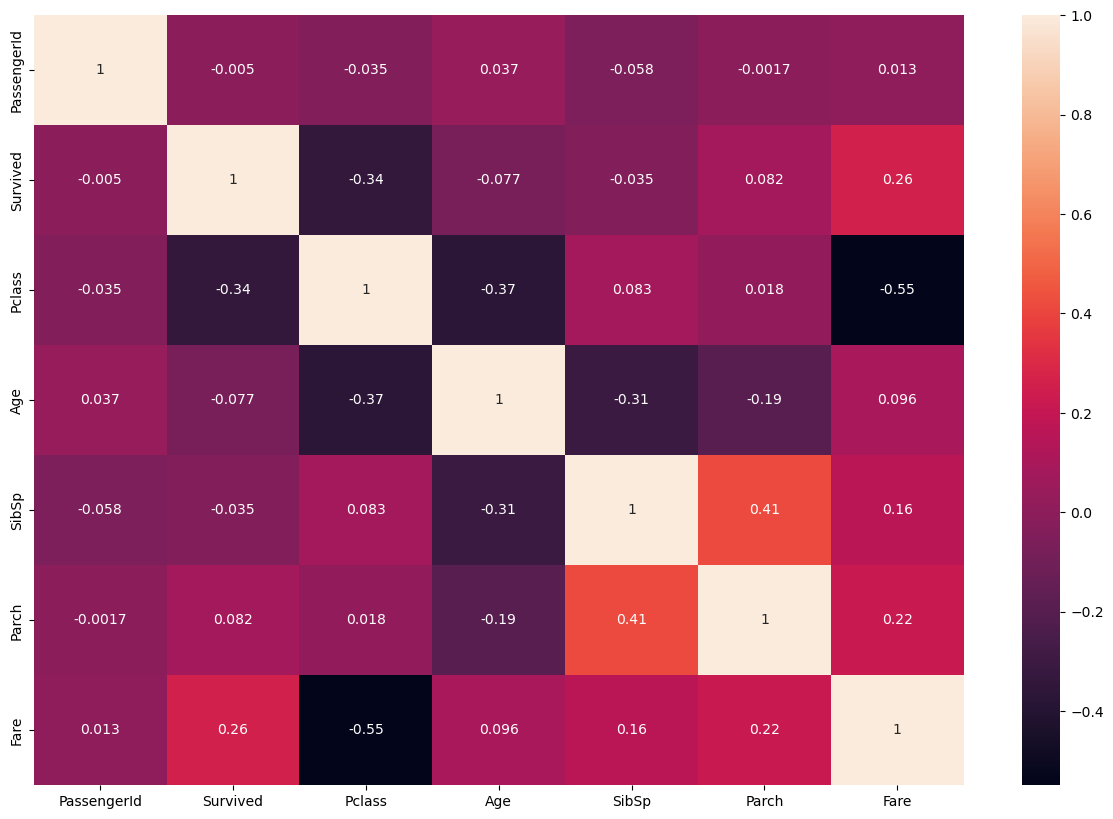

In [8]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
#eliminate ticket, name, body(alot are null, unuseable),boat

In [11]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
#CHECK NULL
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
#fill null age with mean 
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [17]:
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

In [18]:
df.drop(['Cabin','Name','Ticket'],axis=1, inplace=True)

In [19]:
#VISUALISATION

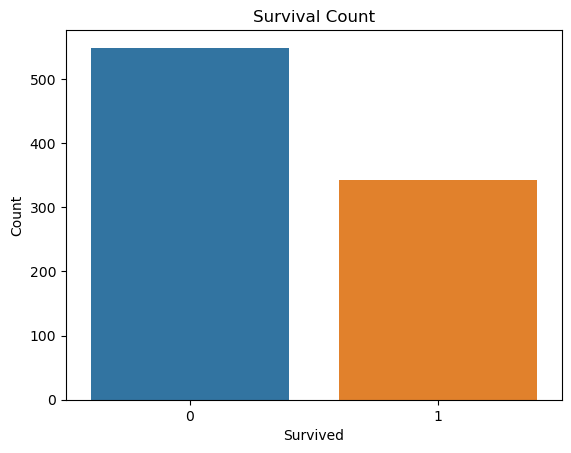

In [20]:
# Visualize the distribution of the 'Survived' column (0 = Not Survived, 1 = Survived)
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

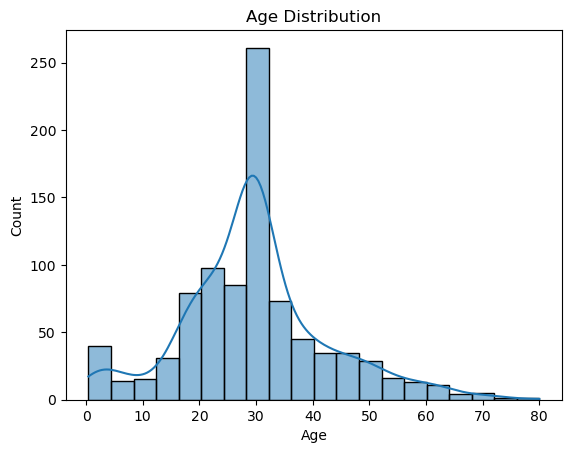

In [21]:
#Visualize the distribution of the 'Age' column
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

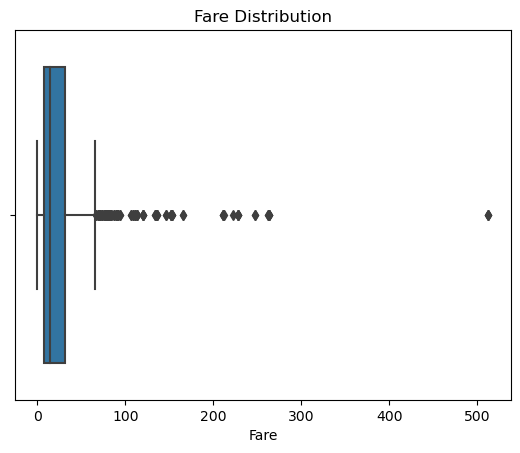

In [22]:
#Visualize the distribution of the 'Fare' column and detect outliers we will handle outliers in the next step
sns.boxplot(data=df, x='Fare')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_80864\554220597.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


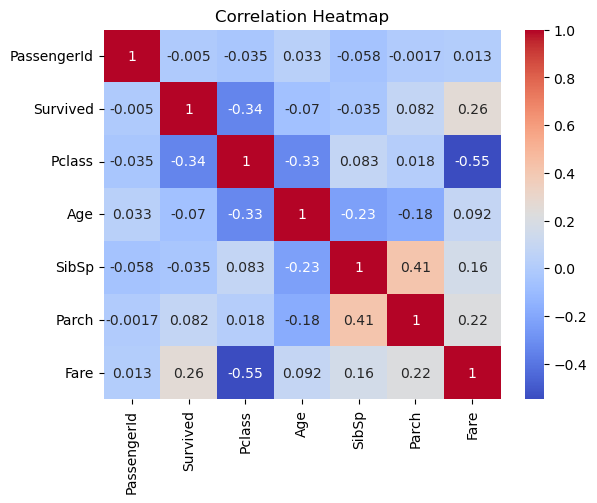

In [23]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# detect and handle outliers with z score

In [24]:
# z>3 data could be outlier

In [25]:
z_scores = np.abs(stats.zscore(df['Age']))
max_threshold=3

outliers = df['Age'][z_scores > max_threshold]

# Print and visualize the outliers
print("Outliers detected using Z-Score:")
print(outliers)

Outliers detected using Z-Score:
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


In [26]:
column_name = 'Fare'

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1
# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows with values outside the IQR bounds
df_cleaned = df[(df[column_name] > lower_bound) & (df[column_name] <upper_bound)]

# Display the original and cleaned DataFrame sizes
print(f"Original DataFrame size: {df.shape}")
print(f"Cleaned DataFrame size: {df_cleaned.shape}")
df_cleaned

Original DataFrame size: (891, 9)
Cleaned DataFrame size: (775, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [27]:
df=df_cleaned

x=df.drop('Survived', axis=1)
y=df['Survived']
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.000000,1,0,7.2500,S
2,3,3,female,26.000000,0,0,7.9250,S
3,4,1,female,35.000000,1,0,53.1000,S
4,5,3,male,35.000000,0,0,8.0500,S
5,6,3,male,29.699118,0,0,8.4583,Q


In [28]:
#encode 
# LabelEncoder; first category is 0, the second is 1, and so on.
en = LabelEncoder()
x['Sex'] = en.fit_transform(x['Sex'])

In [29]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,S
2,3,3,0,26.000000,0,0,7.9250,S
3,4,1,0,35.000000,1,0,53.1000,S
4,5,3,1,35.000000,0,0,8.0500,S
5,6,3,1,29.699118,0,0,8.4583,Q


In [30]:
x = pd.get_dummies(x,columns=['Embarked'])
#binary variables indicate presence of a particular category.
#mecah jawabannya yg ada (s dan q : embarked_s and embarked_q)
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.000000,1,0,7.2500,0,0,1
2,3,3,0,26.000000,0,0,7.9250,0,0,1
3,4,1,0,35.000000,1,0,53.1000,0,0,1
4,5,3,1,35.000000,0,0,8.0500,0,0,1
5,6,3,1,29.699118,0,0,8.4583,0,1,0


In [31]:
#feature scaling
scale = StandardScaler()
x[['Age', 'Fare']] = scale.fit_transform(x[['Age', 'Fare']])
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,-0.556219,1,0,-0.779117,0,0,1
2,3,3,0,-0.243027,0,0,-0.729373,0,0,1
3,4,1,0,0.461654,1,0,2.599828,0,0,1
4,5,3,1,0.461654,0,0,-0.720161,0,0,1
5,6,3,1,0.046606,0,0,-0.690071,0,1,0


In [32]:
#train and test; generalize model generalize new data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(620, 10)
(155, 10)
(620,)
(155,)


In [33]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(x_train,y_train)
# print the intercept : predicted  baseline probability of the event 
# when input is 0
print(lm.intercept_)
# best if intercept that is close to zero. 
# indicates model is well-calibrated and is not overfitting or underfitting the training data.

[2.40140787]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
predictions = lm.predict(x_test)
accuracy = np.mean(predictions == y_test)
print('Accuracy:', accuracy)

Accuracy: 0.7354838709677419


In [35]:
#abis interpreting coefficient mre mse
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2645161290322581
MSE: 0.2645161290322581
RMSE: 0.5143113152870138


In [36]:
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier
# Check the rest of  classifiers
name = SVC()
name.fit(x_train, y_train)
Y_pred = name.predict(x_test)
acc_svc = round(name.score(x_train, y_train) * 100, 2)
acc_svc

67.26

In [37]:
# from sklearn.linear_model import LogisticRegression
#Support Vector Machine
from sklearn.svm import SVC, LinearSVC
name = SVC()
name.fit(x_train, y_train)
Y_pred = name.predict(x_test)
acc_svc = round(name.score(x_train, y_train) * 100, 2)
acc_svc

67.26

In [38]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier
# Check the rest of  classifiers
name = KNeighborsClassifier()
name.fit(x_train, y_train)
Y_pred = name.predict(x_test)
acc_svc = round(name.score(x_train, y_train) * 100, 2)
acc_svc

73.71

In [39]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0], dtype=int64)

In [40]:
y_train

147    0
868    0
60     0
468    0
777    1
      ..
79     1
116    0
308    0
502    0
112    0
Name: Survived, Length: 620, dtype: int64

Compare the results of machine learning techniques, what model predict better for titanic survival ?

Change the target of prediction from survived to Age, and compare the results of machine learning techniques, what model predict better for titanic survival?

Part I: Look at the heatmap to find the most important features that are correlated with each other. Then, think of two hypotheses about how these features might be related to survival. Finally, use descriptive statistics to test your hypotheses. 

SibSp(n of pasenger;s sibling) and Parch(n of spuse/child in the ship) : 0.41 
#2 the more siblings they have, 
    CF:the more likely they will travel with more of their fam members
    DS: scatter plot doesnt show any relation 
#3 the more siblings, the more likely they will survive 
    CF: help from other siblings n so on.
    DS: mean of SibSp and Parch for non-survivor is higher than survivor> WRONG, the corr shows the more sibs, more likely to not survive

Survived and Fare: 0.26
#1 The higher the tix the more likely they will survive
    CF: higher quality if price is higher, safer, less casualties
    DS: higher fare mean for survivor TRUE?


Part II: How does the mean age of survivors differ from the mean age of non-survivors in a random sample of people (let us say 50 people)?
bcs the two groups are not the same people, as age might vary in both, it is 

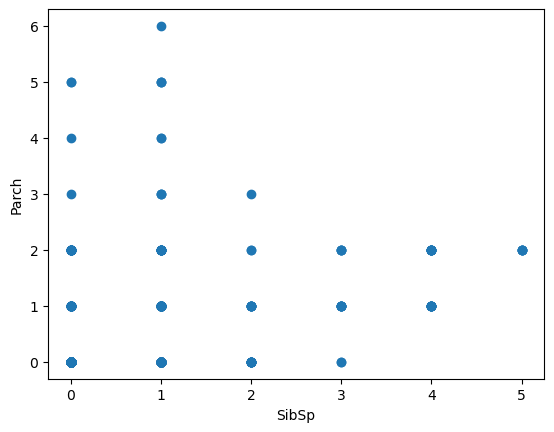

In [41]:
# Create a scatter plot
plt.scatter(df['SibSp'], df['Parch'])
# Label
plt.xlabel('SibSp')
plt.ylabel('Parch')
plt.show()
#trend is not easy to define

In [42]:
# Calculate the mean and standard deviation of SibSp and Parch for passengers who survived
#low sd : clustered around mean
survivors = df[df['Survived'] == 1]
survivor_sibsp_mean = survivors['SibSp'].mean()
survivor_sibsp_std = survivors['SibSp'].std()
survivor_parch_mean = survivors['Parch'].mean()
survivor_parch_std = survivors['Parch'].std()

# Calculate the mean and standard deviation of SibSp and Parch for passengers who did not survive
non_survivors = df[df['Survived'] == 0]
non_survivor_sibsp_mean = non_survivors['SibSp'].mean()
non_survivor_sibsp_std = non_survivors['SibSp'].std()
non_survivor_parch_mean = non_survivors['Parch'].mean()
non_survivor_parch_std = non_survivors['Parch'].std()

# Print the results
print('Mean SibSp for survivors:', survivor_sibsp_mean)
print('Standard deviation of SibSp for survivors:', survivor_sibsp_std)
print('Mean SibSp for non-survivors:', non_survivor_sibsp_mean)
print('Standard deviation of SibSp for non-survivors:', non_survivor_sibsp_std)
print('Mean Parch for survivors:', survivor_parch_mean)
print('Standard deviation of Parch for survivors:', survivor_parch_std)
print('Mean Parch for non-survivors:', non_survivor_parch_mean)
print('Standard deviation of Parch for non-survivors:', non_survivor_parch_std)

Mean SibSp for survivors: 0.43346007604562736
Standard deviation of SibSp for survivors: 0.7113731247640955
Mean SibSp for non-survivors: 0.439453125
Standard deviation of SibSp for non-survivors: 0.9833476976490179
Mean Parch for survivors: 0.44866920152091255
Standard deviation of Parch for survivors: 0.7692988634462821
Mean Parch for non-survivors: 0.28515625
Standard deviation of Parch for non-survivors: 0.7893210780080986


In [43]:
# Calculate the mean and standard deviation of Fare and Survived for passengers who survived
#low sd : clustered around mean
survivors = df[df['Survived'] == 1]
survivor_fare_mean = survivors['Fare'].mean()
survivor_fare_std = survivors['Fare'].std()

non_survivors = df[df['Survived'] == 0]
non_survivor_fare_mean = non_survivors['Fare'].mean()
non_survivor_fare_std = non_survivors['Fare'].std()

# Print the results
print('Mean Fare for survivors:', survivor_fare_mean)
print('Standard deviation of Fare for survivors:', survivor_fare_std)
print('Mean fare for non-survivors:', non_survivor_fare_mean)
print('Standard deviation of fare for non-survivors:', non_survivor_fare_std)


Mean Fare for survivors: 22.260362357414447
Standard deviation of Fare for survivors: 15.229860676686691
Mean fare for non-survivors: 15.542275390625
Standard deviation of fare for non-survivors: 12.040839536550223


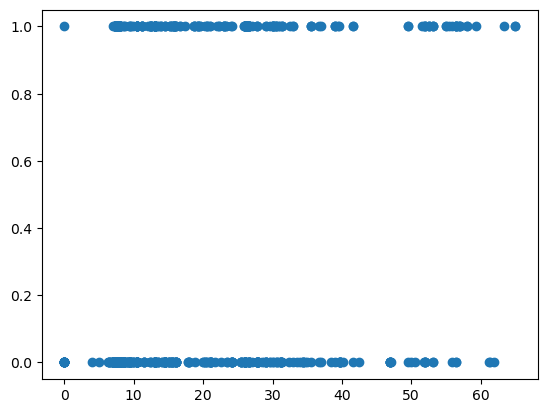

In [44]:
# Create a scatter plot
plt.scatter(df['Fare'], df['Survived']==1)


In [49]:
import pandas as pd
df=pd.read_csv(r"train.csv")
mean_age = df['Age'].mean()
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [50]:
df['Age'].fillna(mean_age, inplace=True)
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)
print(df.isnull().sum())
print(df.notnull().sum())
# 687/ 891, ~ 77 missing data, too much! So we drop Cabin
df.drop(['Cabin'],axis=1, inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [51]:
import scipy.stats as stats
import numpy as np
z_scores = np.abs(stats.zscore(df['Age']))
max_threshold=3

outliers = df['Age'][z_scores > max_threshold]

# Print and visualize the outliers
print("Outliers detected using Z-Score:")
print(outliers)

Outliers detected using Z-Score:
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


In [52]:
column_name = 'Age'

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows with values outside the IQR bounds
# df_cleaned = df[(df[column_name] > lower_bound) & (df[column_name] <upper_bound)]

# Replace outliers with median
df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = df[column_name].median()

# Display the original and cleaned DataFrame sizes
print(f"Original DataFrame size: {df.shape}")
print(f"Cleaned DataFrame size: {df.shape}")

Original DataFrame size: (891, 11)
Cleaned DataFrame size: (891, 11)


In [53]:
# Import the stats module from scipy library
import scipy.stats as stats
import numpy as np

# Extract the age values of survivors and non-survivors from the dataset
survived_age = df.loc[df['Survived'] == 1, 'Fare']
died_age = df.loc[df['Survived'] == 0, 'Fare']

# State the null and alternative hypotheses
# H0: μ1 = μ2 (where μ1 is the mean age of survivors and μ2 is the mean age of non-survivors)
# H1: μ1 ≠ μ2

# Use the stats.ttest_ind function to calculate the t-statistic and p-value
t_stat, p_value = stats.ttest_ind(survived_age, died_age)

# Print the results
print(f'The t-statistic is {t_stat:.2f} and the p-value is {p_value:.2f}')

# Interpret the results
if p_value < 0.05:
    print('We reject the null hypothesis and conclude that there is a statistically significant difference in the mean age of survivors and non-survivors.')
else:
    print('We conclude that there is no statistically significant difference in the mean age of survivors and non-survivors.')

# Calculate the effect size : a common measure of effect size for comparing the means of two independent groups.
effect_size = t_stat / np.sqrt(len(survived_age) + len(died_age) - 2)

# Print the effect size
print(f'The effect size is {effect_size:.2f}')


The t-statistic is 7.94 and the p-value is 0.00
We reject the null hypothesis and conclude that there is a statistically significant difference in the mean age of survivors and non-survivors.
The effect size is 0.27


In [61]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

# Select a random sample of 50 people from the dataset
sample = df.sample(n=50, random_state=42)


# Extract the Fare values of survivors and non-survivors from the dataset
survived_Fare= sample.loc[df['Survived'] == 1, 'Fare']
died_Fare = sample.loc[df['Survived'] == 0, 'Fare']

# Use the stats.ttest_ind function to calculate the t-statistic and p-value
t_stat, p_value = stats.ttest_ind(survived_Fare, died_Fare)


# Define the hypotheses and alternative hypotheses
hypothesis = "there is no difference in the mean Fare of survivors and non-survivors."
alternative_hypothesis = "there is a difference in the mean Fare of survivors and non-survivors."


# Print the results
print(f'The t-statistic is {t_stat:.2f} and the p-value is {p_value:.2f}')

# Print the p-value
print(f"p-value = {p_value:.4f}")

# Compare the p-value with the significance level and make a decision
if p_value <= 0.05:
    print(f"Since p-value {p_value:.4f} is less than or equal to alpha 0.05, we reject the hypothesis and conclude that {alternative_hypothesis}.")
else:
    print(f"Since p-value {p_value:.4f} is greater than alpha 0.05, we fail to reject the hypothesis.")

# Report and interpret the results
print(f"Our conclusion is that based on a random sample of 50 people from the Titanic dataset, {alternative_hypothesis} at a significance level of 0.5.")

The t-statistic is 0.29 and the p-value is 0.78
p-value = 0.7757
Since p-value 0.7757 is greater than alpha 0.05, we fail to reject the hypothesis.
Our conclusion is that based on a random sample of 50 people from the Titanic dataset, there is a difference in the mean Fare of survivors and non-survivors. at a significance level of 0.5.
